# Data Analysis and Exploration 

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



#packages for data exploration
import nltk
from nltk import FreqDist
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string

#module for helper function of text data analysis 

import data_analysis_functions as da

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kyonkyon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Data preparation 

In [2]:
#convert csv file into pandas DataFrame
data = "./data/reddit_dataset.csv"

reddit_df = da.importData(data)

In [3]:
reddit_df.head()

,id,comment,score
0,1,Dumbass liberals. You’d let anyone fuck you o...,0.979
1,2,"Yeah ok, shut the fuck up bitch. It’s Bernie o...",0.958
2,3,"fuck you, you're just pretending to be blocked...",0.938
3,4,"""He's a borderline rapist and that's just what...",0.938
4,5,"If you stick your dick in crazy, the crazy sti...",0.938


In [4]:
len(reddit_df)

6000

In [5]:
#Remove rows with delted comments
reddit_df = da.cleanDf(reddit_df)
len(reddit_df)

5721

In [6]:
reddit_df

,id,comment,score
0,1,Dumbass liberals. You’d let anyone fuck you o...,0.979
1,2,"Yeah ok, shut the fuck up bitch. It’s Bernie o...",0.958
2,3,"fuck you, you're just pretending to be blocked...",0.938
3,4,"""He's a borderline rapist and that's just what...",0.938
4,5,"If you stick your dick in crazy, the crazy sti...",0.938
5,6,Your monstrosity of a forehead almost distract...,0.938
6,7,"yeah you don’t know how it works, fuck off",0.938
7,8,"nah fuck that. we need war , climate disaster ...",0.938
8,10,Dane here and I have to say WHAT THE FUCK dude...,0.917
9,12,so why should anyone give a flying fuck about ...,0.917


In [7]:
da.textConvert(reddit_df, 'comment', 'cleaned_comment')


,id,comment,cleaned_comment,score
0,1,Dumbass liberals. You’d let anyone fuck you o...,"[dumbass, liberal, let, anyone, fuck]",0.979
1,2,"Yeah ok, shut the fuck up bitch. It’s Bernie o...","[yeah, ok, shut, fuck, bitch, bernie, bust, no...",0.958
2,3,"fuck you, you're just pretending to be blocked...","[fuck, pretending, blocked, get, back, work, r...",0.938
3,4,"""He's a borderline rapist and that's just what...","[borderline, rapist, know, ca, nt, possibly, w...",0.938
4,5,"If you stick your dick in crazy, the crazy sti...","[stick, dick, crazy, crazy, stick]",0.938
5,6,Your monstrosity of a forehead almost distract...,"[monstrosity, forehead, almost, distracted, at...",0.938
6,7,"yeah you don’t know how it works, fuck off","[yeah, know, work, fuck]",0.938
7,8,"nah fuck that. we need war , climate disaster ...","[nah, fuck, need, war, climate, disaster, hope...",0.938
8,10,Dane here and I have to say WHAT THE FUCK dude...,"[dane, say, fuck, dude, utter, bullshit, pleas...",0.917
9,12,so why should anyone give a flying fuck about ...,"[anyone, give, flying, fuck, average, brit, th...",0.917


## Basic Text Data Analysis and Exploration

#### Data Distirbution 

In [8]:
distribution_df = da.dataDistribution(reddit_df)

<AxesSubplot:>

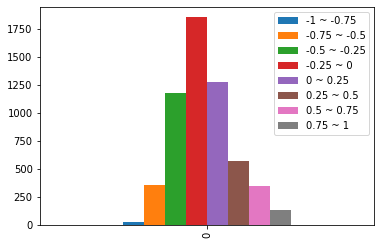

In [9]:
distribution_df.plot(kind='bar')

#### Split data into offensive, neutral, and non offensive

In [10]:
offensive_df = pd.DataFrame(columns = reddit_df.columns)
neutral_df = pd.DataFrame(columns = reddit_df.columns)
non_offensive_df = pd.DataFrame(columns = reddit_df.columns)

In [11]:
for index, row in reddit_df.iterrows():
    if -1 < row['score'] <= -0.5:
        non_offensive_df = non_offensive_df.append(row, ignore_index = True)
    elif -0.5 < row['score'] <= 0.5:
        neutral_df = neutral_df.append(row, ignore_index = True)
    else:
        offensive_df = offensive_df.append(row, ignore_index = True)

In [12]:
reddit_text = da.flatten(reddit_df, 'cleaned_comment')
offensive_text = da.flatten(offensive_df, 'cleaned_comment')
neutral_text = da.flatten(neutral_df, 'cleaned_comment')
non_offensive_text = da.flatten(non_offensive_df, 'cleaned_comment')

#### Frequency distribution

Frequency Distribution of reddit data set

In [13]:
reddit_fd = da.frequentDistribution(reddit_text)

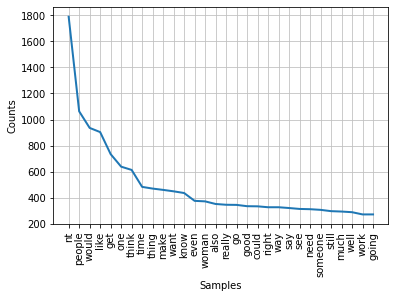

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [14]:
reddit_fd.plot(30)

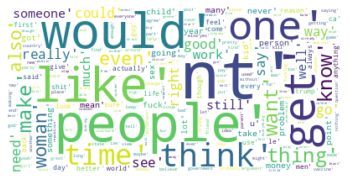

<module 'matplotlib.pyplot' from '/Users/kyonkyon/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

In [15]:
da.plot_wordCloud(reddit_text)

Frequency Distribution of offensive comment

In [16]:
offensive_fd = da.frequentDistribution(offensive_text)

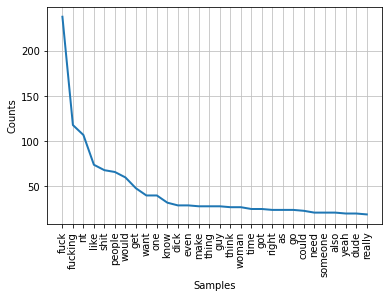

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
offensive_fd.plot(30)

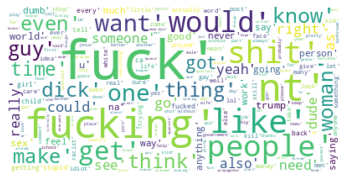

<module 'matplotlib.pyplot' from '/Users/kyonkyon/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

In [18]:
da.plot_wordCloud(offensive_text)

Frequency Distribution of neutral comment

In [19]:
neutral_fd = da.frequentDistribution(neutral_text)

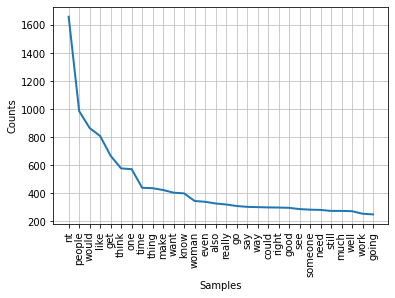

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
neutral_fd.plot(30)

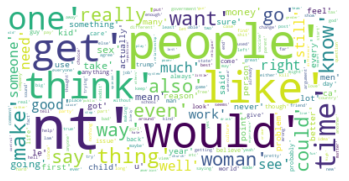

<module 'matplotlib.pyplot' from '/Users/kyonkyon/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

In [21]:
da.plot_wordCloud(neutral_text)

Frequency Distribution of non-offensive comment

In [22]:
non_offensive_fd = da.frequentDistribution(non_offensive_text)

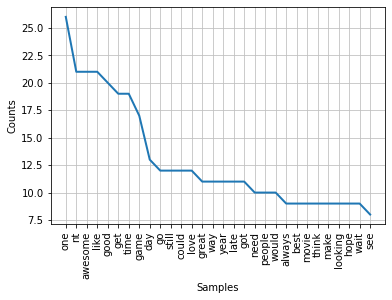

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [23]:
non_offensive_fd.plot(30)

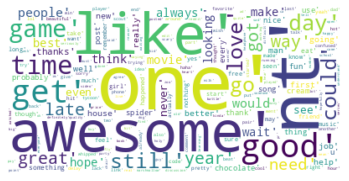

<module 'matplotlib.pyplot' from '/Users/kyonkyon/Library/Python/3.7/lib/python/site-packages/matplotlib/pyplot.py'>

In [24]:
da.plot_wordCloud(non_offensive_text)

#### Lexical Diversity

In [25]:
reddit_vocab, reddit_lex = da.lexical_diversity(reddit_text)

In [26]:
offensive_vocab, offensive_lex = da.lexical_diversity(offensive_text)

In [27]:
neutral_vocab, neutral_lex = da.lexical_diversity(neutral_text)

In [28]:
non_offensive_vocab, non_offensive_lex = da.lexical_diversity(non_offensive_text)

In [29]:
vocab_size = [reddit_vocab, offensive_vocab, neutral_vocab, non_offensive_vocab]
lex_diversity = [reddit_lex, offensive_lex, neutral_lex, non_offensive_lex]
index = ['Reddit comments', 'Offensive comments', 'Neutral comments', 'Non-offensive comments']

In [32]:
lexical_df = da.plot_lexical_diversity(vocab_size, lex_diversity, index)
lexical_df

,Vocaburaly,Lexical Diversity
Reddit comments,12966,0.128768
Offensive comments,2556,0.381436
Neutral comments,12316,0.134272
Non-offensive comments,1208,0.532628
